<a href="https://colab.research.google.com/github/tejask-42/Modelling-Gravitational-Systems/blob/main/Recruitment_Problem_Statement_KCAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-CAP Assignment

### Below are the instructions for the assignment. Please read and follow them carefully.

1.   For doing the K-CAP project it is **mandatory** to complete the K-CAP assignment, based on which selections will be done.
1.   There are 3 parts in this assignment and **none** are optional.
2.   Answer/code for each question is to be written in the code cell following the question.
3.   **Do not** edit this notebook. Make a copy in your drive to solve the assignment.
3.   The csv files mentioned in the assignment, ```cepheids.csv``` and ```curves.csv``` can be downloaded and used from this [Drive link](https://drive.google.com/drive/folders/17DkvsU0GVGOnffZCsgkkp5A3SbQRTWQf?usp=sharing).
2.   Comment your code wherever needed.
3.   The resources that may be required for help and reference are uploaded on this [github repo](https://github.com/krittikaiitb/tutorials).
4.   The **deadline** for the assignment submission is **29th November 11.59 pm** and no further extension will be provided.
5.   Upload your notebook on Google Colab and share the link in this [google form](https://docs.google.com/forms/d/e/1FAIpQLSewj0UyD1a22d_GKOq-7_i9yWu40Az_x9s-rxJqVF-60_C9CA/viewform?usp=sharing) for submission.
6.   Make sure you have given access to submission file before submitting.

# All The Best!!


# Cepheid variables

Cepheid variables are a type of variable star that pulsate radially, varying in both diameter and temperature, which produces changes in brightness with a well-defined stable period and amplitude. These stars are significant in the field of astronomy for several reasons:

1. **Standard Candles**: Cepheids have a well-established relationship between their luminosity and pulsation period, known as the Leavitt law or period-luminosity relation. This makes them excellent standard candles for measuring astronomical distances.

2. **Distance Measurement**: By observing the period of a Cepheid's brightness variations, astronomers can determine its absolute magnitude. Comparing this with the apparent magnitude allows for the calculation of the distance to the star, which is crucial for mapping the scale of the universe.

3. **Galactic and Extragalactic Studies**: Cepheids are used to measure distances within our galaxy and to nearby galaxies. This helps in understanding the structure and scale of the Milky Way and the local group of galaxies.

4. **Historical Importance**: The discovery of Cepheids in the Andromeda galaxy by Edwin Hubble was pivotal in establishing that the universe is expanding, leading to the formulation of the Big Bang theory.

Cepheids continue to be a vital tool in modern astrophysics, aiding in the calibration of other distance measurement methods and contributing to our understanding of the cosmos.

# Part 1

The mechanism driving the pulsations of Cepheids involves complex interactions between radiation pressure, gas pressure, and opacity within the star's interior. Give a qualitative explanation of the thermal instability that leads to the pulsations in Cepheid variable stars, focusing on the role of the κ-mechanism (opacity mechanism).

Cepheid variable stars are a type of standard candle used to find out the distance of stars or galaxies from Earth. They allowed us to find out that the universe is expanding. They are upto 30,000 times more luminous than the sun and 5 to 20 times more massive. They are called "variable" stars because their luminosity changes periodically with time. It attains a maximum, a minimum, and back to the same maximum in one time period, but the time taken to go from a minimum to a maximum is lesser than the other way. This periodic phenomenon is possible due to the thermal instability inside these stars. This can be explained using the κ(kappa)-mechanism. The star has a inner core and an outer layer. It contains helium atoms and ions. The outer layer, which is relatively cooler, contains singly ionised helium ions which are relatively more transparent. The inner core, which is hotter and is under much more pressure, contains doubly ionised helium ions which are relatively more opaque than singly ionised ions. This opacity causes more light to be absorbed by the core, and also traps radiation. If at an instance, we see the cepheid star having some diameter, with both the outer He+ layer and inner He2+ core present, the transparent outer layer will not absorb as much light energy, causing it to cool and contract. Upon contracting, the pressure in inner core increases, creating more opaque He2+ ions, which will absorb more light energy and trap radiation, thus causing it to expand again. This cycle continues periodically causing the star to pulsate both in observed brightness and size. This is possible only if the star is present in a specific temperature range called the instability strip on the Hertzsprung-Russell Diagram.

# Part 2

The data in ```cepheids.csv``` is organised in two columns: the period of the cepheid variable and its absolute magnitude calculated from mean luminosity.

These two values are actually related by the Leavitt law:
$$M = a \cdot \log_{10}{P} + b$$

First, find the constants $a$ and $b$ in this relation to fit the given data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
%matplotlib inline

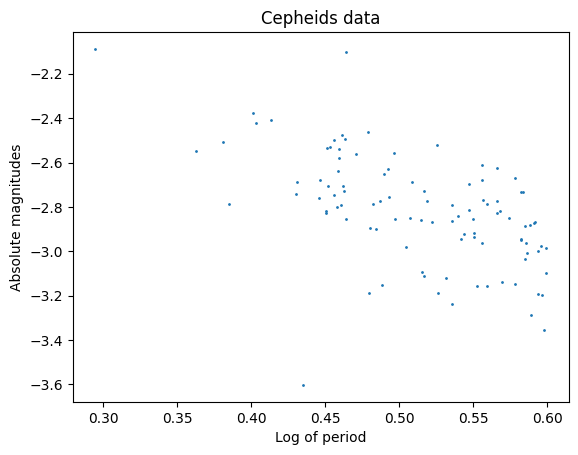

In [ ]:
with open("cepheids.csv", "r") as f:
  lines = f.read().split("\n")[1:-1] # First line contains heading Period, M, last line blank
lines = np.array([[float(i) for i in n.split(",")] for n in lines]) # convert string to float
x_data = np.log10(lines[:, 0]) # converting time data to log10 as needed in eqn
y_data = lines[:, 1]
plt.xlabel("Log of period")
plt.ylabel("Absolute magnitudes")
plt.title("Cepheids data")
plt.scatter(x_data, y_data, s=1)
plt.show()

In [ ]:
def y(x, m, c): # as M has a linear relation with log10(P)
  return m*x + c
p_opt, p_cov = cf(y, x_data, y_data) # finding best linear fit for data
a, b = p_opt # gives best parameters of m and c, which is a and b here respectively
print(f"a = {a}, b = {b}")
print(f"M = {round(a, 2)}*log10P + {round(b, 2)}") # final relation of Leavitt law

a = -2.2164100178416217, b = -1.680867436126496
M = -2.22*log10P + -1.68


Next, plot the data along with your fitted line to visually verify that you have found the correct constants.

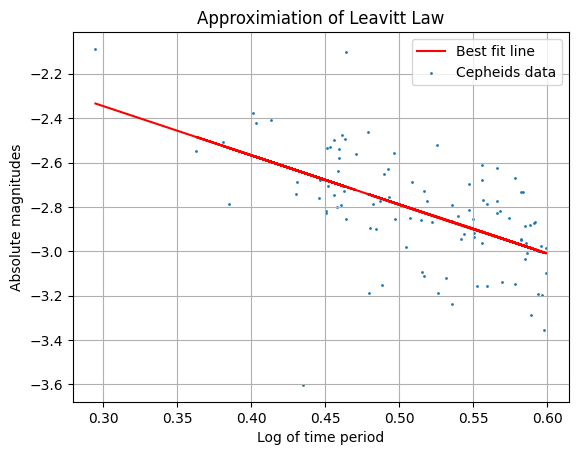

In [ ]:
plt.plot(x_data,y(x_data,*p_opt),label='Best fit line',color='r')
# plotting all corresponding y values to get the straight line
plt.scatter(x_data,y_data,label='Cepheids data',s=1)
plt.ylabel('Absolute magnitudes')
plt.xlabel('Log of time period')
plt.title('Approximiation of Leavitt Law')
plt.grid()
plt.legend()

# Part 3

Now we are ready to use the result we have obtained from the above markdown to solve the problem.

Given in the ```curves.csv``` file is the data of the light curves of many cepheids in the line of sight of a galaxy. The data contains three columns: ID(Unique for every cepheid), JD (the julian date of observation) and the apparent magnitude observed.

In [ ]:
with open("curves.csv", "r") as f:
  lines = f.read().split("\n")[1:-1] # First line contains ID, JD, m, last line blank
lines = np.array([[float(i) for i in n.split(",")] for n in lines]) # convert string to float
ids, jds, m = lines[:, 0], lines[:, 1], lines[:, 2]

First we need to find the period of each cepheid.

In [ ]:
from astropy.timeseries import LombScargle
# using LombScargle tool from astropy which identifies dominant frequency in unevenly spaced
# time series data such as this one by trying to fit sinusoidal functions to the data
uids = 0
cepheids = dict()
for id in np.unique(ids):
  JD = jds[ids == id]
  magnitude = m[ids == id]

  # Normalize JD to avoid numerical instability as JD values are large and only difference matters
  JD_normalized = JD - JD[0]

  # Compute the Lomb-Scargle periodogram
  frequency, power = LombScargle(JD_normalized, magnitude).autopower()

  # Find the period corresponding to the highest power
  best_frequency = frequency[np.argmax(power)]
  best_period = 1 / best_frequency

  cepheids[id] = best_period
  uids += 1
# now cepheids dictionary contains the period in days of each star corresponding to its ID
print(cepheids[ids[0]])

3.6161445481481476


Next, using the calculated periods, find the absolute magnitude of these stars using the relation you found earlier.



In [ ]:
for id in cepheids:
  cepheids[id] = [cepheids[id], y(np.log10(cepheids[id]), a, b)]
# now cepheids dictionary contains period as well as absolute magnitude of each star
print(cepheids[ids[0]])

[3.6161445481481476, -2.918168980221012]


Then, using the apparent magnitude data, find the distance to these cepheid variables.

In [ ]:
# using apparent magnitude(m) - absolute magnitude(M) = 5 * (logd - 1)
# where d is the distance in parsecs
distances = []
for id in cepheids:
#  d  =   10 ^ ((    m        -   M             + 5)  / 5))
  dist = 10 ** ((m[ids == id] - cepheids[id][1] + 5) / 5)
  # taking the average of this array of distances
  cepheids[id].append(np.average(dist))
  distances.append(np.average(dist))
# now cepheids dictionary contains period, absolute magnitude, and distance to each star
print(cepheids[ids[0]])

[3.6161445481481476, -2.918168980221012, 1000686.9925843175]


Finally, find the distance to the galaxy being observed.

In [ ]:
from astropy.stats import sigma_clipped_stats

In [ ]:
# as we are observing in line of sight of a galaxy, some stars could be included in this data
# which do not belong to the galaxy
mean, median, std = sigma_clipped_stats(distances)
# clips the data to mean += std.dev, and recalculates till convergence
# thus outliers will be removed and mean will hold the distance to our galaxy
print(f"The distance to the galaxy is {round(mean, 2)} parsecs.")

The distance to the galaxy is 834378.26 parsecs.
